# Question 2

Assume the initial position of the end-effector is p = (1, 2, 3). The goal is for the end-effector to pass through a via-point (5, 10, 12) at t = 1s and reach the goal at (10, 8, 7) by t = 5s.

1. Generate a 3D trajectory for the end-effector using two second-order polynomials (ax^2 + bx + c), one for each dimension (planning in Cartesian space).
2. Plot the generated trajectories in the form of t-x, t-y, and t-z (one figure for each dimension).

Notes:
 - We have an initial position
 - We have a via-point
 - We have a goal
 - A 2D trajectory can be made with two second-order polynomials, one for each dimension - but don't we have 3 dimensions?

In [3]:
import numpy as np
import matplotlib.pyplot as plt

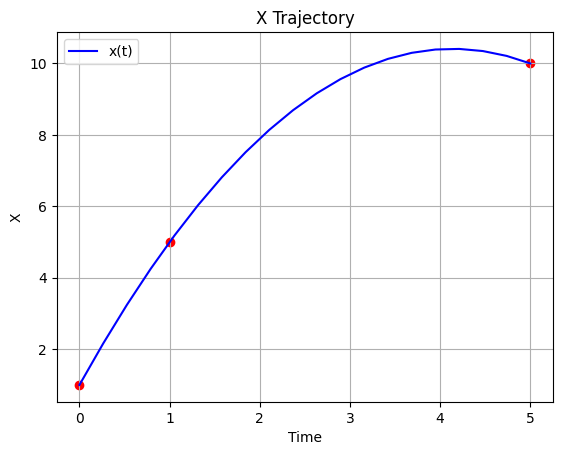

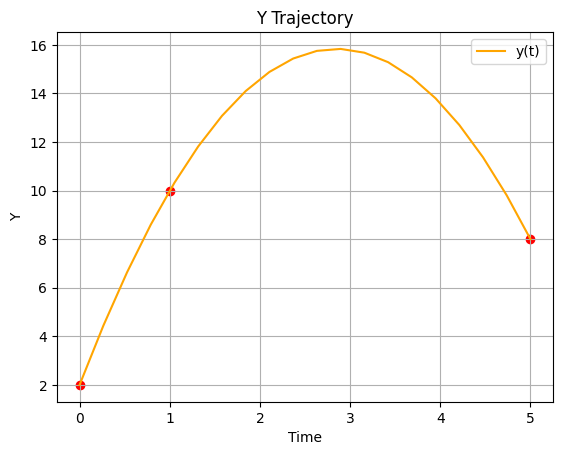

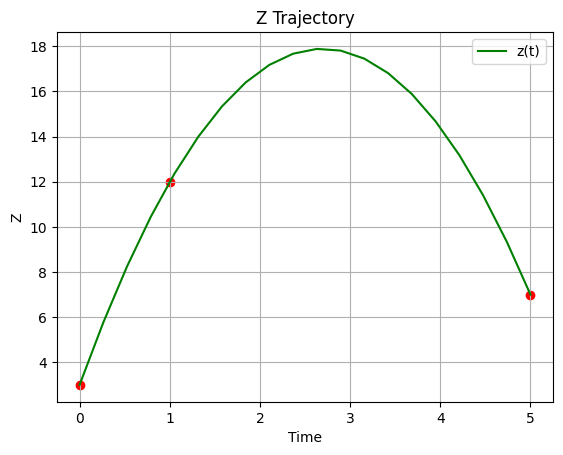

In [12]:
# Second-order polynomials trajectory
# The question says to use two second-order polynomials, but we are working in three dimensions
# I have assumed this was a mistake and have used three second-order polynomials

# x(t) = a_x * t^2 + b_x * t + c_x
# y(t) = a_y * t^2 + b_y * t + c_y
# z(t) = a_z * t^2 + b_z * t + c_z

# We need to determine the coefficients a_x, b_x, c_x, a_y, b_y, c_y, a_z, b_z and c_z
# This will give us our function to find xyz values and thus our trajectory

# Define the time and position of start point, via point and end-point
start_point, via_point, end_point = np.array([1, 2, 3]), np.array([5, 10, 12]), np.array([10, 8, 7])
points = np.array([
    start_point,
    via_point,
    end_point
])
start_time, via_time, end_time = 0.0, 1.0, 5.0

# Time values
T = np.array([
    [start_time**2, start_time, 1],
    [via_time**2, via_time, 1],
    [end_time**2, end_time, 1]
])

# Use to calculate x, y, z values given appropriate coefficients a, b, c and t values
def trajectory(t_values, coefficients):
    return coefficients[0] * t_values**2 + coefficients[1] * t_values + coefficients[2]

# x(t)
# x(0) = 1, x(1) = 5, x(5) = 10
# Find the coefficients for x
x_coefficients = np.linalg.solve(T, np.array([start_point[0], via_point[0], end_point[0]]))

# y(t)
# y(0) = 2, y(1) = 10, y(5) = 8
# Find the coefficients for y
y_coefficients = np.linalg.solve(T, np.array([start_point[1], via_point[1], end_point[1]]))

# z(t)
# z(0) = 3, z(1) = 12, z(5) = 7
# Find the coefficients for z
z_coefficients = np.linalg.solve(T, np.array([start_point[2], via_point[2], end_point[2]]))

# No. t values to plot for x, y and z
t_count = 20

# Divide start-end time into t_count segments
t_values = np.linspace(start_time, end_time, t_count)

# Generate xyz values for t_count time stamps
x_values = trajectory(t_values, x_coefficients)
y_values = trajectory(t_values, y_coefficients)
z_values = trajectory(t_values, z_coefficients)

# Create a plot for each axis' trajectory

# Plot x(t)
plt.figure()
plt.plot(t_values, x_values, label='x(t)', color='blue')
plt.scatter([start_time, via_time, end_time], [start_point[0], via_point[0], end_point[0]], color='red')
plt.xlabel('Time')
plt.ylabel('X')
plt.legend()
plt.title('X Trajectory')
plt.grid()

# Plot y(t)
plt.figure()
plt.plot(t_values, y_values, label='y(t)', color='orange')
plt.scatter([start_time, via_time, end_time], [start_point[1], via_point[1], end_point[1]], color='red')
plt.xlabel('Time')
plt.ylabel('Y')
plt.legend()
plt.title('Y Trajectory')
plt.grid()

# Plot z(t)
plt.figure()
plt.plot(t_values, z_values, label='z(t)', color='green')
plt.scatter([start_time, via_time, end_time], [start_point[2], via_point[2], end_point[2]], color='red')
plt.xlabel('Time')
plt.ylabel('Z')
plt.legend()
plt.title('Z Trajectory')
plt.grid()

plt.show()



